# Problem 1: Multiclass (30 %)
### So far we have largely focused on binary classification, where the input is a document and the output is a yes or a no (or probability of yes). 

### In fact, more complex tasks exist where the input is a document and the output can be multiple (more than two) classes. 

## In this problem we'll investigate two so-called multiclass problems
### Multiclass: an observation is assigned inclusion in ONE of a N $N>2$ categories
 - ### E.g. is this sentence positive, negative, or neutral sentiment
 - ### E.g. is this email spam or not spam


### Multiclass-multilabel: an observation can belong to more than one of $N>=2$ categories
 - ### E.g. is this document about `{sports, current events, Steph Curry}` ( a document can be about more than one)
 - ### E.g. is this blood sample A, B, O, $+$, $-$ (blood can be `A+` or `A-`)

## We will study the metrics we can use to evaluate these classification problems

In [2]:
import numpy as np
import pandas as pd
%pylab inline

import json

from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
np.random.seed(1234)

## We will start with multiclass by studying the 20 newsgroups data
# $ \\ $
# $ \\ $
# Part 0: get the data
 - ### use the builtin function `from sklearn.datasets import fetch_20newsgroups`
 - ### NB: look at the docs and use the `remove` kwarg in order to get cleaned data

## TODO
 - ## fetch the data separately for the train and test data
 - ## How many classes are present? 
 - ## What is the most common class- please give the name and not the number.
 - ## What is the accuracy of the best constant guess in the train set?

In [4]:
from sklearn.datasets import fetch_20newsgroups


In [5]:
data_train = fetch_20newsgroups(...
data_test = fetch_20newsgroups(...



SyntaxError: invalid syntax. Perhaps you forgot a comma? (1581571410.py, line 1)

In [ ]:
val_counts = ...
print('found {} classes'.format(val_counts.shape[0]))
most_common_class = ...
print('most common class: {}'.format(most_common_class))

dummy_acc = accuracy_score(...
print('constant guess acc: {:.3f}'.format(dummy_acc))

# Part 1: fit a model
## As we saw with mnist, logistic regression is capable of fitting multi-class data.
 - ## Encode the text with as a bag of words and fit logistic regression to the data
 - ## Calcuate the out of sample accuracy score

In [6]:
# Todo
# 1. make a count vectorizer with max_features=20000
# 2. fit it
# 3. transform the train and test data into number
vec = ..

# your code here
xtr = ... # train data
xte = ... # test data


In [ ]:
# TODO
# 1. fit logistic regression
# 2. compute accuracy score

# your code here
accuracy_score(...

# Part 2: Evaluate metrics
### As we have seen previously, while accuracy is useful, it does not always capture all the behavior we want in a metric.

### Here we will extend the concept of f1 score to the multiclass setting. There are several ways to do this
 - report a different f1 score for every class (no averaging)
 - report the mean f1 score over all classes
 - report a weighted f1 score weighted by class prevelance. 

### For each of these three types of f1
 - calculate the score(s) without the help of scikit learn
 - compare it to the corresponding f1 score evaluated with scikit-learn (NB you'll need to read the docs for `f1_score`. 
 - Write down the pros and cons for this method of calculating multiclass f1 score

In [8]:
preds = lr.predict(xte)

f1s = []
for label_index, label_name in enumerate(data_train.target_names):
    # calculate the f1 score of one (label_index) vs rest
    # your code here...
    f1s.append(...

for label_name, fs in zip(data_train.target_names, f1s):
    print('fscore for {} \t = {:.3f}'.format(label_name, fs))

print('\n\n')
# compare to sklearn
success = (f1s == f1_score(data_test.target, preds, average=None)).all()
if success:
    print('sklearn builtin matches results')
else:
    print('scores do not match')

In [1]:
# The pros are ...
# The cons are ...

In [ ]:
# now the macro f1 (the mean of the f1s for each class)
f1_macro = ... # calculate without sklearn
f1_macro_sk = f1_score(... # calculate with sklearn
assert(f1_macro == f1_macro_sk)
print('macro f1: {} \t sklearn macro f1 {}'.format(
    f1_macro, 
    f1_macro_sk
))



In [ ]:
# The pros are ...
# The cons are ...

In [ ]:
# now weighted by class prevalence
# TODO:
#  - calculate the frequency of each class
#  - take a weighted average of the f1s, weighted by these weights
#  - compare to sklearn
wts = ...
weighted_f1 = # without sklearn
weighted_f1_sk = f1_score(... # with sklearn

print('weighted f1 {} \t sklearn weighted f1 {}'.format(weighted_f1, weighted_f1_sk))



In [ ]:
# The pros are ...
# The cons are ...

# Part 3: Confusion Matrix
## The confusion matrix is a handy way to understand errors in classification problems.  It is a 2-D grid of what values were predicted and what the actual values were. 

See [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) in the sklearn docs. 

## Create a confusion matrix for the 20-newsgroups dataset and comment on the most common failure modes

In [3]:
from sklearn.metrics import confusion_matrix
# your code here
# NB: it's handy to call `pd.DataFrame` on the confusion matrix to print it out nicely

In [4]:
# comments here

# Problem 2: Multiclass Multilabel Problems (20 %)
### In this problem we'll examine academic articles from the arXiv.
### Authors who submit articles can attach one or more categories to the articles

# Part 0: Load the data
## TODO
 - ### load the data
 - ### compute all of the unique categories in the train data
 - ### What are the 10 most common categories which occur together

In [52]:
import json
from collections import Counter

# Load the data
with open('data/arxiv-qfin-train.json') as fi:
    data_train = json.load(fi)

with open('data/arxiv-qfin-test.json') as fi:
    data_test = json.load(fi)

print(f"Number of training samples: {len(data_train)}, Number of test samples: {len(data_test)}")

Number of training samples: 9923, Number of test samples: 2481


In [55]:
# Compute all unique categories in the train data
all_categories = set()
for article in data_train:
    all_categories.update(article['category'])

print(f"Number of unique categories: {len(all_categories)}")
print("Unique categories:", all_categories)

Number of unique categories: 12
Unique categories: {'q-fin.CP', 'q-fin.ST', 'econ.EM', 'q-fin.GN', 'q-fin.EC', 'math.PR', 'q-fin.RM', 'econ.GN', 'q-fin.PM', 'q-fin.TR', 'q-fin.MF', 'q-fin.PR'}


In [56]:
# Find the 10 most common category combinations
category_combinations = Counter()
for article in data_train:
    categories = sorted(article['category'])
    for i in range(len(categories)):
        for j in range(i+1, len(categories)):
            category_combinations[tuple(sorted([categories[i], categories[j]]))] += 1

print("\n10 most common category combinations:")
for combo, count in category_combinations.most_common(10):
    print(f"{combo}: {count}")


10 most common category combinations:
('econ.GN', 'q-fin.EC'): 965
('math.PR', 'q-fin.PR'): 392
('q-fin.CP', 'q-fin.PR'): 253
('math.PR', 'q-fin.MF'): 224
('math.PR', 'q-fin.CP'): 218
('math.PR', 'q-fin.RM'): 170
('q-fin.ST', 'q-fin.TR'): 153
('q-fin.EC', 'q-fin.GN'): 147
('q-fin.PM', 'q-fin.RM'): 136
('q-fin.MF', 'q-fin.PR'): 136


# Part 1: Encode the data

## We will encode the title of each article using a bag of words (`CountVectorizer`). Try limiting the features to about 20k. 

## Encoding targets is as bit trickier for multilabel problems. In this case we want our target to be a matrix of $N_{samples} x N_{categories}$ but each row does not have to sum to 1.
 - ## NB: scikit learn as a `MultiLabelBinarizer` to help here. 

# $ \\ $
## TODO
 - ## fit a `CountVectorizer` on the titles to create `x_train` and `x_test`
 - ## create `y_train` and `y_test` to be matrices of $N_{samples} x N_{categories}$ with all 0s and 1s

In [33]:
# Create bag-of-words representation of article titles using CountVectorizer, limited to 20,000 features
vec = CountVectorizer(max_features=20000)
vec.fit([article['title'] for article in data_train])
x_train = vec.transform([article['title'] for article in data_train])
x_test = vec.transform([article['title'] for article in data_test])

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# Fit the binarizer on all categories from both train and test data
mlb.fit([article['category'] for article in data_train + data_test])

# Transform the train and test data categories into binary matrix
y_train = mlb.transform([article['category'] for article in data_train])
y_test = mlb.transform([article['category'] for article in data_test])

print(y_train.shape, y_test.shape)
print(list(mlb.classes_))

(9923, 12) (2481, 12)
['econ.EM', 'econ.GN', 'math.PR', 'q-fin.CP', 'q-fin.EC', 'q-fin.GN', 'q-fin.MF', 'q-fin.PM', 'q-fin.PR', 'q-fin.RM', 'q-fin.ST', 'q-fin.TR']


## Part 2: Model the data
### While scikit-learn can't handle multilabel data in logistic regression, keras can. 
### Create and fit a multilabel logistic regression model and fit it. 
### NB: think hard about the activation function and loss function that are appropriate in this case!

In [35]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
import keras.backend as K

K.clear_session()
print("x_train shape:", x_train.shape)

# Define the model architecture
input_shape = x_train.shape[1]  # This will be 7679 (number of features)
doc_input = Input(shape=(input_shape,))
x = Dense(64, activation='relu')(doc_input)
x = Dense(32, activation='relu')(x)
# Output layer with sigmoid activation for multi-label classification
output = Dense(len(mlb.classes_), activation='sigmoid')(x)

model = Model(inputs=doc_input, outputs=output)

# Compile the model with binary crossentropy loss for multi-label classification
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

x_train shape: (9923, 7679)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7679)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       491,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 493,996 (1.88 MB)

 Trainable params: 493,996 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0910 - loss: 0.5124 - val_accuracy: 0.2861 - val_loss: 0.3262
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3624 - loss: 0.2901 - val_accuracy: 0.3673 - val_loss: 0.2601
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4864 - loss: 0.2096 - val_accuracy: 0.3965 - val_loss: 0.2501
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5655 - loss: 0.1636 - val_accuracy: 0.3995 - val_loss: 0.2551
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6038 - loss: 0.1304 - val_accuracy: 0.3929 - val_loss: 0.2677
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6317 - loss: 0.1026 - val_accuracy: 0.3804 - val_loss: 0.2847
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6487 - loss: 0.0815 - val_accuracy: 0.3809 - val_loss: 0.3097
Epoch 8/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6686 - loss: 0.0628 - val_accuracy: 0.

<Axes: >

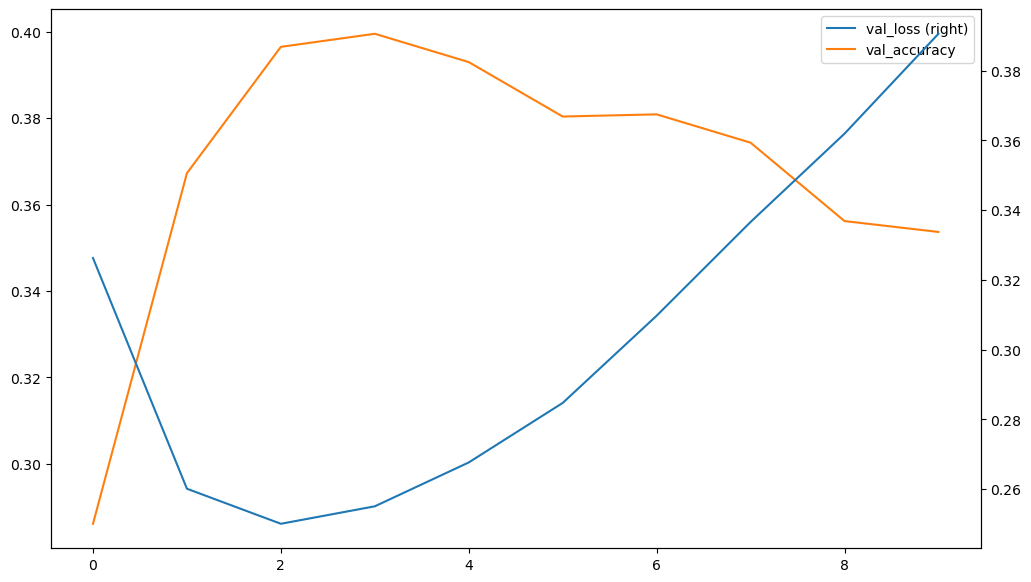

In [37]:
pd.DataFrame(model.history.history)[['val_loss', 'val_accuracy']].plot(
    figsize=(12,7), secondary_y='val_loss'
)

# Part 3: f1 score
## While modeling is more difficult in the multilabel case, the metrics are, oddly, simpler. Here, we can only compute metrics class by class.

### For each class, print the accuracy and f1 score for the class. Comment on the results. 

In [45]:
preds = model.predict(x_test)
# loop through all the classes
# compute and print the accuracy and f1 for each class
for i, class_ in enumerate(mlb.classes_):
    acc = accuracy_score(y_test[:, i], preds[:, i] > 0.5)
    f1 = f1_score(y_test[:, i], preds[:, i] > 0.5)
    print(f'Class: {class_:<20} Accuracy: {acc:.3f}    F1 Score: {f1:.3f}')

print("\nComments:")
print("The accuracy and F1 scores vary across different classes, indicating that the model performs differently, depending on the category.")
print("Classes with higher F1 scores suggest better overall performance (good balance between precision and recall), whereas classes with lower F1 scores may indicate a worse balance between precision and recall.")
print("Interestingly, the accuracy and F1 scores are not necessarily correlated. For example, the class 'quant-ph' has a high F1 score but a low accuracy, while the class 'astro-ph' has a low F1 score but a high accuracy.")
print("Discrepancies between accuracy and F1 score for a class may indicate class imbalance or specific prediction patterns.")
print("We should thus consider focusing on improving performance for classes with lower f1 scores, and investigate potential class imbalance and flawed prediction patterns.")

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Class: econ.EM              Accuracy: 0.929    F1 Score: 0.632
Class: econ.GN              Accuracy: 0.941    F1 Score: 0.624
Class: math.PR              Accuracy: 0.887    F1 Score: 0.413
Class: q-fin.CP             Accuracy: 0.884    F1 Score: 0.304
Class: q-fin.EC             Accuracy: 0.892    F1 Score: 0.559
Class: q-fin.GN             Accuracy: 0.840    F1 Score: 0.458
Class: q-fin.MF             Accuracy: 0.889    F1 Score: 0.258
Class: q-fin.PM             Accuracy: 0.919    F1 Score: 0.474
Class: q-fin.PR             Accuracy: 0.905    F1 Score: 0.566
Class: q-fin.RM             Accuracy: 0.915    F1 Score: 0.554
Class: q-fin.ST             Accuracy: 0.838    F1 Score: 0.600
Class: q-fin.TR             Accuracy: 0.936    F1 Score: 0.553

Comments:
The accuracy and F1 scores vary across different classes, indicating that the model performs differently, depending on the category.
Classes with higher F1 scores suggest better overall performa

# Problem 3: New Metrics (30%)
## In this problem we'll explore new metrics associated with true positives and false positives.

## Part 0: Load the IMDB data and fit a model
 - ### Load the imdb data
 - ### featurize the text using TFIDF
 - ### Fit logistic regression
 - ### calculate the in-sample and out of sample accuracy and f1 score

In [65]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline


def load_imdb_data_text(imdb_data_dir, random_seed=1234):
    train_dir = os.path.join(imdb_data_dir, 'train')
    test_dir = os.path.join(imdb_data_dir, 'test')

    np.random.seed(random_seed)
    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(train_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename) as fi:
                text = fi.read()
            target = (label == 'pos')
            texts.append(text)
            targets.append(target)

    train_docs = texts
    y_train = np.array(targets)


    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(test_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename) as fi:
                text = fi.read()
            target = (label == 'pos')
            texts.append(text)
            targets.append(target)

    test_docs = texts
    y_test = np.array(targets)

    inds = np.arange(y_train.shape[0])
    np.random.shuffle(inds)

    train_docs = [train_docs[i] for i in inds]
    y_train = y_train[inds]
    
    return (train_docs, y_train), (test_docs, y_test)

(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text('data/aclImdb/')
print('found {} train docs and {} test docs'.format(len(train_docs), len(test_docs)))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
found 25000 train docs and 25000 test docs


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [67]:
# Featurize the text using TFIDF
vec = TfidfVectorizer(max_features=10000)
X_train = vec.fit_transform(train_docs)
X_test = vec.transform(test_docs)

# Fit logistic regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Calculate the in-sample and out of sample accuracy and f1 score
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)

print('#'*20 + ' in sample ' + '#'*20 )
print('\t\taccuracy: {:.3f}'.format(accuracy_score(y_train, preds_train)))
print('\t\tf1: {:.3f}'.format(f1_score(y_train, preds_train)))
print('\n\n')
print('#'*20 + ' out of sample ' + '#'*20 )
print('\t\taccuracy: {:.3f}'.format(accuracy_score(y_test, preds_test)))
print('\t\tf1: {:.3f}'.format(f1_score(y_test, preds_test)))

#################### in sample ####################
		accuracy: 0.923
		f1: 0.923



#################### out of sample ####################
		accuracy: 0.883
		f1: 0.883


## Part 2: Tradeoff between true positives and false positives
Typically we take a threshold of 0.5 probability to consider something a positive example.
However, as we change this threshold we can change the number of true positives we get.
 - Example: at a theshold of 0.0001 we will get nearly all of the true positives
 - Example: at a threshold of 0.999 we will get almost none of the true positives

Notice: as we change our threshold and increase the number of true positives we will also increase the number of false positives we pick up.

In this part you will create a graph of the false positive rate on the x-axis and the true positive rate on the y-axis. This is often called the `receiver operator characteristic`. Make this curve for the out of sample data below.

Note: while you can use the builtin scikit-learn functionality for this, you will __not receive credit__ if you do. 

In [69]:
from tqdm import tqdm


In [70]:
# Calculate true positive rates and false positive rates for different thresholds
thresholds = np.linspace(0, 1, 100)  # Create 100 evenly spaced thresholds from 0 to 1
true_pos_rates = []
false_pos_rates = []

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

for threshold in tqdm(thresholds):
    # Apply threshold to get binary predictions
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    # Calculate true positives and false positives
    true_positives = np.sum((y_test == 1) & (y_pred == 1))
    false_positives = np.sum((y_test == 0) & (y_pred == 1))
    
    # Calculate true negatives and false negatives
    true_negatives = np.sum((y_test == 0) & (y_pred == 0))
    false_negatives = np.sum((y_test == 1) & (y_pred == 0))
    
    # Calculate true positive rate and false positive rate
    tpr = true_positives / (true_positives + false_negatives)
    fpr = false_positives / (false_positives + true_negatives)
    
    true_pos_rates.append(tpr)
    false_pos_rates.append(fpr)

# Convert lists to numpy arrays for easier plotting
true_pos_rates = np.array(true_pos_rates)
false_pos_rates = np.array(false_pos_rates)

100%|██████████| 100/100 [00:00<00:00, 1037.13it/s]


Text(0.5, 1.0, 'Receiver Operator Characteristic')

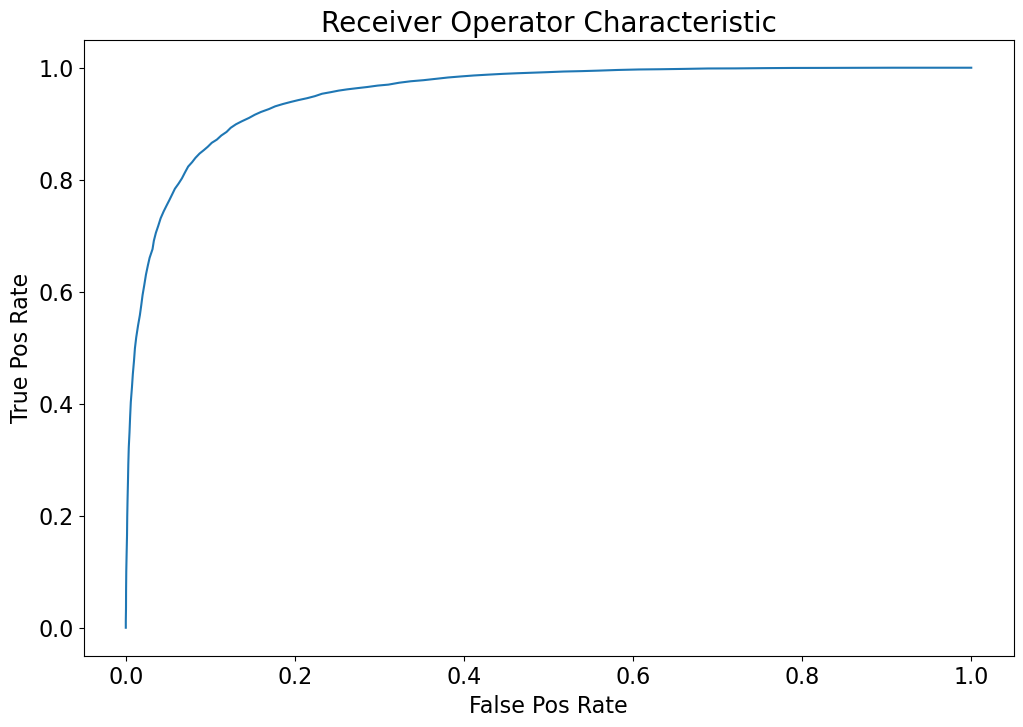

In [71]:
pd.Series(true_pos_rates, index=false_pos_rates).plot(figsize=(12,8), fontsize=16)
plt.xlabel('False Pos Rate', fontsize=16)
plt.ylabel('True Pos Rate', fontsize=16)
plt.title('Receiver Operator Characteristic', fontsize=20)

## Part 3: Baseline
 - What does the receiver operator curve look like for a random guessing classifier? 
 - Make the same plot as above but add the random guessing curve
 - Add comments about WHY the random guessing curve looks this way

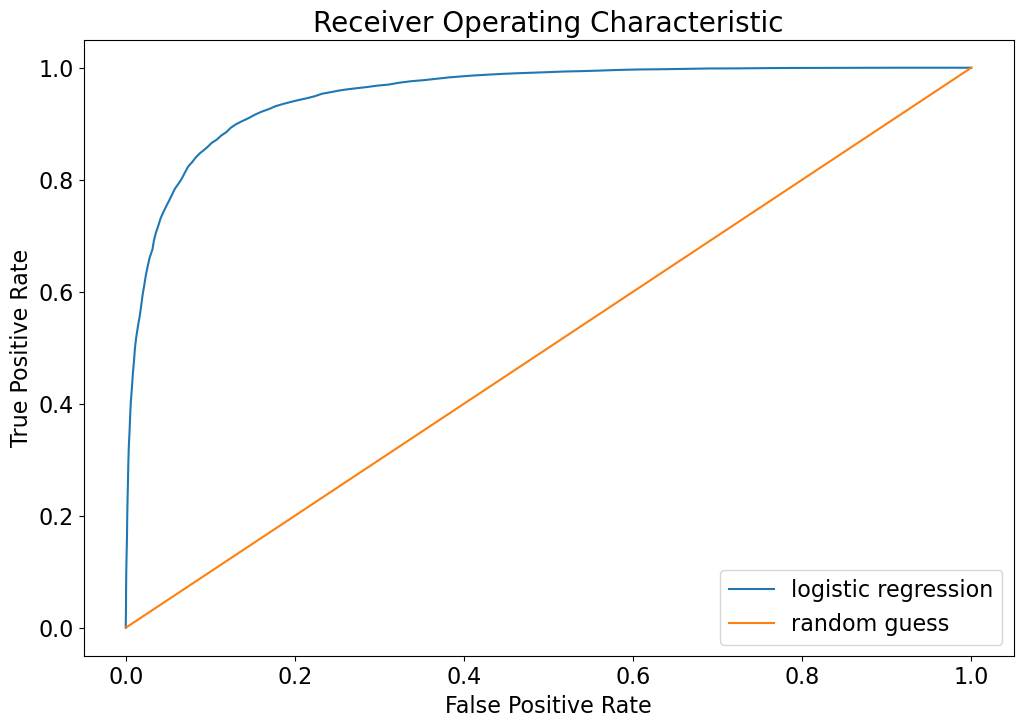

In [73]:
ax = pd.Series(true_pos_rates, index=false_pos_rates, name='logistic regression').plot(
    figsize=(12,8), fontsize=16
)
# Create a baseline series for random guessing
# For random guessing, the true positive rate equals the false positive rate
baseline_series = pd.Series(np.linspace(0, 1, 100), index=np.linspace(0, 1, 100), name='random guess')
baseline_series.plot(ax=ax, fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic', fontsize=20)
plt.legend(fontsize=16)

In [76]:
# add comments here
print("Random guessing produces a diagonal line because it has equal probability of true positives and false positives.")

Random guessing produces a diagonal line because it has equal probability of true positives and false positives.


## Part 4: Boiling it down to a single number
 - While the ROC is a useful curve and contains a lot of information, it is useful to distill in down to a single number. Typically, the area under the curve is used. Calculate the area under the curve and add it as the title to your previous plot. 
 - Hint: think about approximations for integrals for finding area under a curve


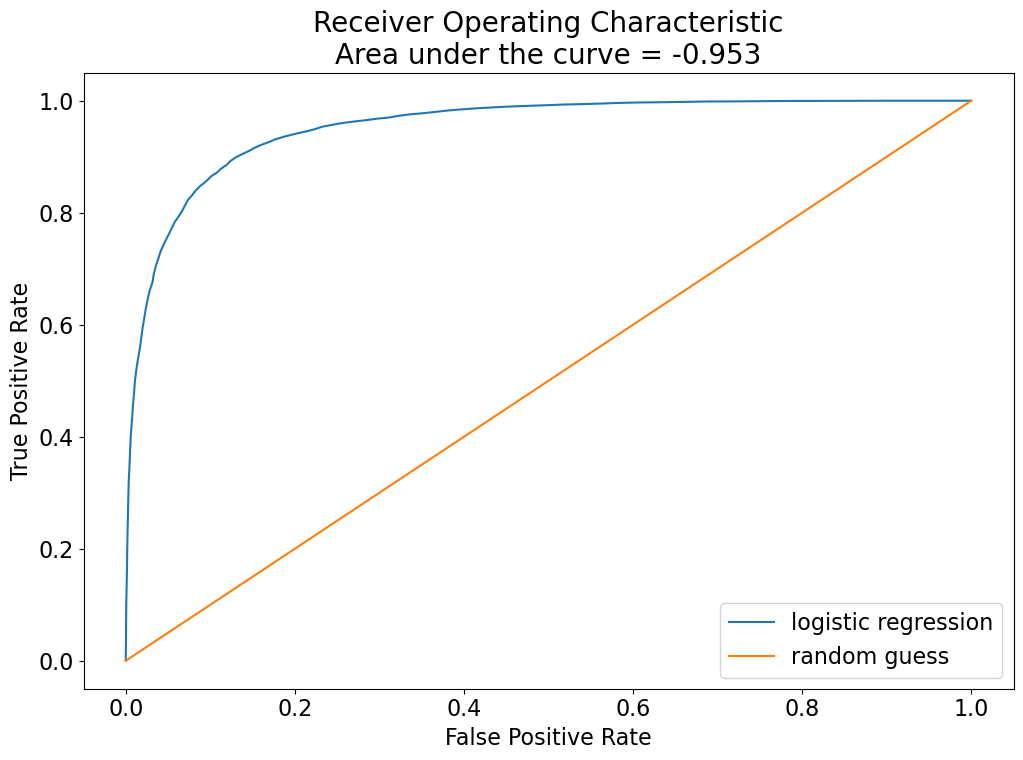

In [77]:
# Calculate the area under the ROC curve using trapezoidal approximation
area_under = np.trapz(true_pos_rates, false_pos_rates)

# Repeat the plotting code
ax = pd.Series(true_pos_rates, index=false_pos_rates, name='logistic regression').plot(
    figsize=(12,8), fontsize=16
)
baseline_series = pd.Series(np.linspace(0, 1, 100), index=np.linspace(0, 1, 100), name='random guess')
baseline_series.plot(ax=ax, fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic\nArea under the curve = {:.3f}'.format(area_under), fontsize=20)
plt.legend(fontsize=16)

## Part 5: Check you work and comment on the results
 - "There's gotta be a better way!"
 - In fact, `scikit-learn` will take care of a lot of the headache here. 
 - `from sklearn.metrics import plot_roc_curve`
 - read the docs and use this function



<Figure size 1200x800 with 0 Axes>

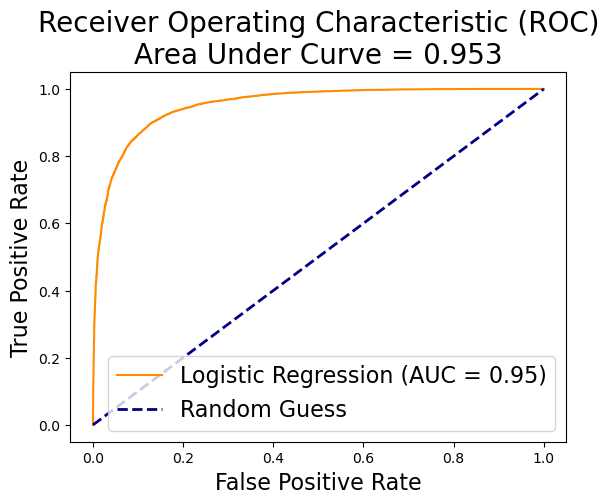

In [79]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# Calculate ROC curve using scikit-learn
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(12, 8))
RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba,
    name="Logistic Regression",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guess")

plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title(f"Receiver Operating Characteristic (ROC)\nArea Under Curve = {roc_auc:.3f}", fontsize=20)
plt.legend(fontsize=16)
plt.show()

## A few comments:
 - The area under the ROC has a nice interpretation. It can be thought of as the probability that a randomly chosen positive example has a higher probability than a randomly chosen negative example.
 - This metric is also nice since it is independent of a threshold. 

# Problem 4: Examining Coefficients (20%)
In class we skipped an important step: we never made sure our models made sense. 
Logistic regression provides coefficients, which allow us to determine if a model
if learning anything reasonable. 

In this problem, you'll load the imdb data, fit logistic regression and exmamine the coefficients. 
Print out the largest and smallest (largest negative) coefficients and comment on the results.

In [82]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline


def load_imdb_data_text(imdb_data_dir, random_seed=1234):
    train_dir = os.path.join(imdb_data_dir, 'train')
    test_dir = os.path.join(imdb_data_dir, 'test')

    np.random.seed(random_seed)
    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(train_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename) as fi:
                text = fi.read()
            target = (label == 'pos')
            texts.append(text)
            targets.append(target)

    train_docs = texts
    y_train = np.array(targets)


    texts = []
    targets = []
    for label in ('pos', 'neg'):
        data_dir = os.path.join(test_dir, label)
        files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in files:
            with open(filename) as fi:
                text = fi.read()
            target = (label == 'pos')
            texts.append(text)
            targets.append(target)

    test_docs = texts
    y_test = np.array(targets)

    inds = np.arange(y_train.shape[0])
    np.random.shuffle(inds)

    train_docs = [train_docs[i] for i in inds]
    y_train = y_train[inds]
    
    return (train_docs, y_train), (test_docs, y_test)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [83]:
(train_docs, y_train), (test_docs, y_test) = load_imdb_data_text('data/aclImdb/')
print('found {} train docs and {} test docs'.format(len(train_docs), len(test_docs)))

found 25000 train docs and 25000 test docs


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vec = TfidfVectorizer(max_features=10000, stop_words='english')
X_train = vec.fit_transform(train_docs)
X_test = vec.transform(test_docs)

lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Hint: you can call `vec.get_feature_names` to get the words in order
# that correspond to the columns of the TFIDF matrix 
# This is useful to pass to the index of a pd.Series

In [91]:
coefs = pd.Series(lr.coef_[0], index=vec.get_feature_names_out())

# Get the 20 largest coefficients by absolute value
largest_coefs = coefs.loc[coefs.abs().nlargest(20).index]

# Print the largest positive and negative coefficients
print("Largest positive coefficients:")
print(largest_coefs[largest_coefs > 0].nlargest(10))
print("\nLargest negative coefficients:")
print(largest_coefs[largest_coefs < 0].nsmallest(10))

Largest positive coefficients:
great        6.813888
excellent    6.151262
best         5.144928
wonderful    4.790313
perfect      4.730705
amazing      4.200831
favorite     4.193709
dtype: float64

Largest negative coefficients:
worst      -9.059190
bad        -6.933840
waste      -6.575027
awful      -6.553715
boring     -5.739468
poor       -5.259611
worse      -4.836199
terrible   -4.599796
poorly     -4.460952
horrible   -4.266812
dtype: float64


In [92]:
# Comments on the results:
print("Positive coefficients:")
print("- Words like 'excellent', 'great', 'wonderful', and 'best' are strongly associated with positive reviews, which is intuitive.")
print("- 'Performances' having a high positive coefficient suggests that praising the acting is a common feature of positive reviews.")

print("\nNegative coefficients:")
print("- 'Worst', 'bad', and 'boring' are unsurprisingly strong indicators of negative reviews.")
print("- 'Waste' (likely in phrases like 'waste of time') is a strong negative predictor.")
print("- Interestingly, 'supposed' has a high negative coefficient, possibly because it's often used in critical contexts (e.g., 'This was supposed to be good, but...')")

print("\nOverall, these coefficients align well with intuitive expectations about movie review language, validating the model's ability to capture meaningful sentiment indicators.")

Positive coefficients:
- Words like 'excellent', 'great', 'wonderful', and 'best' are strongly associated with positive reviews, which is intuitive.
- 'Performances' having a high positive coefficient suggests that praising the acting is a common feature of positive reviews.

Negative coefficients:
- 'Worst', 'bad', and 'boring' are unsurprisingly strong indicators of negative reviews.
- 'Waste' (likely in phrases like 'waste of time') is a strong negative predictor.
- Interestingly, 'supposed' has a high negative coefficient, possibly because it's often used in critical contexts (e.g., 'This was supposed to be good, but...')

Overall, these coefficients align well with intuitive expectations about movie review language, validating the model's ability to capture meaningful sentiment indicators.
